In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,save_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Calculating the count of the images by class wise
data_dir='C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Faulty_solar_panel'
target_size=(224,224)

class_counts={}

for class_name in os.listdir(data_dir):

    class_path=os.path.join(data_dir,class_name)
    if os.path.isdir(class_path):
        images=[f for f in os.listdir(class_path) if f.endswith(('.JPG','.jpg','.PNG','.png')) ]
        class_counts[class_name]=len(images)

print(class_counts)

In [29]:
max_images=max(class_counts.values())
for k,v in class_counts.items():
    print(f"{k}:{v} images")

Bird-drop:189 images
Clean:192 images
Dusty:190 images
Electrical-damage:103 images
Physical-Damage:69 images
Snow-Covered:123 images


In [ ]:
# Generating a sample images 
augmentor=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.1,height_shift_range=0.1,
                             shear_range=0.1,horizontal_flip=True,fill_mode='nearest')

for class_name in os.listdir(data_dir):
    class_path=os.path.join(data_dir,class_name)
    if os.path.isdir(class_path):
        images=[f for f in os.listdir(class_path) if f.endswith(('.JPG','.jpg','.PNG','.png'))]
    current_counts=len(images)
    target_counts=max_images

    if current_counts>target_counts:
        continue
    print(f"Inital values of {class_name}:{current_counts} ")

    i=0
    while current_counts+i < target_counts:
        image_name=images[i%len(images)]
        image_path=os.path.join(class_path,image_name)


        img = load_img(image_path,target_size=target_size)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)

        for batch in augmentor.flow(x, batch_size=1):

            new_name=f"new_{i}_{image_name}"
            save_img(os.path.join(class_path,new_name),batch[0])
            break

        i+=1
print("updated")

Inital values of Bird-drop:189 
Inital values of Clean:192 
Inital values of Dusty:190 
Inital values of Electrical-damage:103 
Inital values of Physical-Damage:69 
Inital values of Snow-Covered:123 
updated


In [31]:
for class_name in os.listdir(data_dir):
    class_path=os.path.join(data_dir,class_name)

    if os.path.isdir(class_path):
        images=len([f for f in os.listdir(class_path) if f.endswith(('.jpg','.JPG','.PNG','.png'))])

    print(f'Updated counts of {class_name} : {images} images')

Updated counts of Bird-drop : 192 images
Updated counts of Clean : 192 images
Updated counts of Dusty : 192 images
Updated counts of Electrical-damage : 192 images
Updated counts of Physical-Damage : 192 images
Updated counts of Snow-Covered : 192 images


In [2]:
import tensorflow as tf

import seaborn as sns

Found 939 images belonging to 6 classes.
Found 232 images belonging to 6 classes.


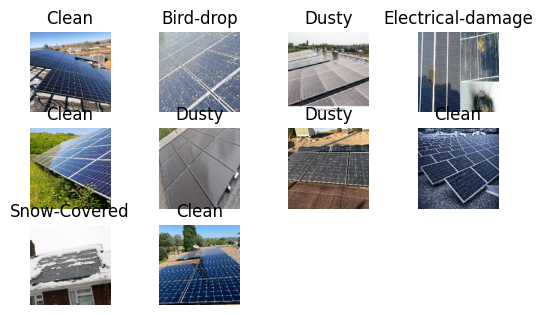

In [3]:
dataset=ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_images= dataset.flow_from_directory('C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Faulty_solar_panel',target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')
test_images= dataset.flow_from_directory('C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Faulty_solar_panel',target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')

class_name=["Bird-drop","Clean","Dusty","Electrical-damage","Physical-Damage","Snow-Covered"]
image,labels=next(train_images)

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    class_labels=class_name[np.argmax(labels[i])]
    plt.title(class_labels)
    plt.grid(True)
    plt.axis('off')
plt.show()


In [ ]:
# Custorm model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


custorm_model=Sequential()

custorm_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
custorm_model.add(MaxPooling2D(2,2))

custorm_model.add(Conv2D(64,(3,3),activation='relu'))
custorm_model.add(MaxPooling2D(2,2))

custorm_model.add(Conv2D(128,(3,3),activation='relu'))
custorm_model.add(MaxPooling2D(2,2))

custorm_model.add(Flatten())

custorm_model.add(Dense(128,activation='relu'))
custorm_model.add(Dropout(0.5))

custorm_model.add(Dense(100,activation='relu'))

custorm_model.add(Dense(6,activation='softmax'))

C:\Users\DEEPADHARSHINI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
custorm_model.compile(optimizer="adam",metrics=['accuracy'],loss="categorical_crossentropy")
history=custorm_model.fit(train_images,epochs=20,validation_data=test_images)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 371s 8s/step - accuracy: 0.9589 - loss: 0.1205 - val_accuracy: 0.6724 - val_loss: 1.4821
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.9702 - loss: 0.1104 - val_accuracy: 0.6767 - val_loss: 1.4315
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.9774 - loss: 0.0893 - val_accuracy: 0.6638 - val_loss: 1.9620
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9661 - loss: 0.0933 - val_accuracy: 0.6293 - val_loss: 1.7000
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.9674 - loss: 0.0967 - val_accuracy: 0.6940 - val_loss: 1.7346
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9667 - loss: 0.1107 - val_accuracy: 0.6897 - val_loss: 1.6246
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9729 - loss: 0.0879 - val_accuracy: 0.6810 - val_loss: 1.5297
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.9688 - loss: 0.1367 - val_accuracy: 0.6810 - val

In [6]:
custorm_model.save('custorm_model_solar.h5')

In [6]:
from tensorflow.keras.preprocessing import image

img_path='C:/Users/DEEPADHARSHINI/OneDrive/Desktop/sample.jpg'
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)/255.0

prediction=custorm_model.predict(img_array)
class_name=["Bird-drop","Clean","Dusty","Electrical-damage","Physical-Damage","Snow-Covered"]
print("Predicted Class:",class_name[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
Predicted Class: Snow-Covered


In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train","Validation"])
plt.show()

NameError: name 'history' is not defined

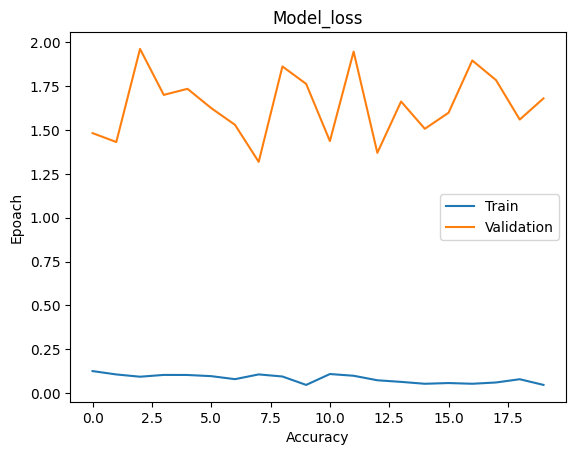

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel("Accuracy")
plt.ylabel("Epoach")
plt.legend(["Train","Validation"])
plt.show()

In [8]:
y_pred=custorm_model.predict(test_images)


C:\Users\DEEPADHARSHINI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


In [ ]:
pip install torchvision




   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\DEEPADHARSHINI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
#RESNET18 MODEL

from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])

data_set=datasets.ImageFolder(root='C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Faulty_solar_panel',transform=transform)

train_size=int(0.8*len(data_set))
val_size=len(data_set)-train_size


train_dataset, val_dataset = random_split(data_set, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')


Training dataset size: 936
Validation dataset size: 235


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes=6
batch_size=32
learning_rate=0.001
epoch=10

model=models.resnet18(pretrained=True)
model.fc=nn.Linear(model.fc.in_features,num_classes)
model=model.to(device)


criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)


train_accuracies=[]
val_accuracies=[]
train_losses=[]
val_losses=[]


for epoch in range(epoch):
    model.train()
    running_loss=0.0
    correct_train=0.0
    total_train=0.0

    for images2,labels in train_loader:
        images2=images2.to(device)
        labels= labels.to(device)

        optimizer.zero_grad()
        outputs=model(images2)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        _,predicted=torch.max(outputs,1)
        total_train += labels.size(0)
        correct_train +=(predicted==labels).sum().item()
        running_loss+=loss.item()
    train_accuracy = 100 * correct_train / total_train
    avg_train_loss = running_loss / len(train_loader)

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epoch}], Training Loss: {epoch_loss:.4f}")

  # Validation Loop
    model.eval()
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # validation loss
            running_val_loss += loss.item()
    # average validation loss and accuracy
    val_accuracy = 100 * correct_val / total
    avg_val_loss = running_val_loss / len(val_loader)

    # Appending the accuracies and losses
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    print(f"Validation Accuracy: {val_accuracy:.2f}%")




C:\Users\DEEPADHARSHINI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DEEPADHARSHINI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/0], Training Loss: 1.1154
Validation Accuracy: 41.70%
Epoch [2/1], Training Loss: 0.7274
Validation Accuracy: 62.55%
Epoch [3/2], Training Loss: 0.5495
Validation Accuracy: 77.02%
Epoch [4/3], Training Loss: 0.4345
Validation Accuracy: 77.02%
Epoch [5/4], Training Loss: 0.4390
Validation Accuracy: 80.85%
Epoch [6/5], Training Loss: 0.4540
Validation Accuracy: 80.85%
Epoch [7/6], Training Loss: 0.2229
Validation Accuracy: 81.70%
Epoch [8/7], Training Loss: 0.1542
Validation Accuracy: 86.38%
Epoch [9/8], Training Loss: 0.1197
Validation Accuracy: 83.83%
Epoch [10/9], Training Loss: 0.1087
Validation Accuracy: 85.53%


In [22]:
print(train_accuracies)

[64.63675213675214, 79.91452991452991, 83.11965811965813, 87.71367521367522, 92.3076923076923, 87.28632478632478, 90.7051282051282, 92.09401709401709, 92.3076923076923, 89.85042735042735]


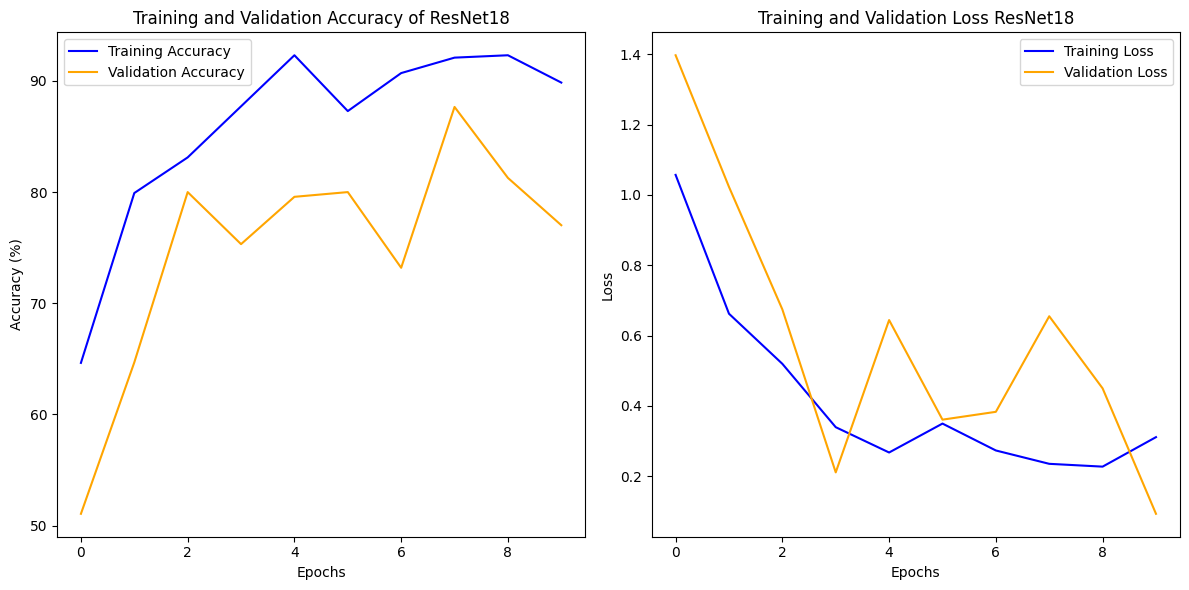

In [25]:
# After training, plot accuracy and loss
plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy of Resnet model
plt.subplot(1, 2, 1)
plt.plot(range(0, epoch + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(0, epoch + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy of ResNet18')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

# Plotting Training and Validation Loss of Resnet model
plt.subplot(1, 2, 2)
plt.plot(range(0, epoch + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(0, epoch + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss ResNet18')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Resnet_metrics.jpg')
plt.tight_layout()
plt.show()

In [27]:
from torchvision import transforms
from PIL import Image

# Load the trained model
model.eval()

#transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# preprocess image
img_path = 'C:/Users/DEEPADHARSHINI/OneDrive/Desktop/sample1.jpg'
image = Image.open(img_path).convert('RGB')
image = transform(image)
image = image.unsqueeze(0)  # Add batch dimension
image = image.to(device)

# Predict
with torch.no_grad():
    output = model(image)
    _, predicted_class = torch.max(output, 1)

# Class names
class_names = ["Bird-drop","Clean","Dusty","Electrical-damage","Physical-Damage","Snow-Covered"]
predicted_label = class_names[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: Electrical-damage


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


torch.save(model.state_dict(), 'C:/Users/DEEPADHARSHINI/OneDrive/Desktop/resnet18.pth')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
pip install tensorflow
